# Top 5 Quotes dummy model

In [1]:
import pandas as pd
import itertools
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "../raw_data/quotes - reduced.csv"
quotes = pd.read_csv(file, decimal=",")
quotes.head(3)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."


In [3]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))

In [4]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))

## Cleaning data: tags are all lowercase, '-' were replaced with ',', duplicates were removed

In [5]:
for index, row in quotes.iterrows():
    quotes.loc[index, "category"] = str(row['category']).lower().replace('-',', ')

In [6]:
quotes['list_tags'] = quotes['category'].copy()
for index,row in quotes.iterrows():
    quotes.loc[index, 'count_tags'] = len(str(row['list_tags']).split(','))
quotes.count_tags.describe()

count    154318.000000
mean          9.758272
std          15.418337
min           1.000000
25%           3.000000
50%           5.000000
75%          11.000000
max         568.000000
Name: count_tags, dtype: float64

In [7]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')

In [8]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(set(row['list_tags']))

In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
quotes['list_tags'] = quotes['list_tags'].apply(remove_punctuations)

In [10]:
vectorizer = TfidfVectorizer()
tags_vectorized = vectorizer.fit_transform(quotes['list_tags'])
dummy_tags = LatentDirichletAllocation(n_components=5)
lda_vectors = dummy_tags.fit_transform(tags_vectorized)

In [11]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(dummy_tags, vectorizer.fit(quotes['list_tags']))

Topic 0:
[('inspirational', 4921.927222418662), ('life', 4137.515316833639), ('quotes', 3616.369391359664), ('wisdom', 2587.854871790226), ('philosophy', 2221.044890012049), ('happiness', 2121.271518643054), ('love', 1891.0543738814968), ('hope', 1807.1545969078013), ('truth', 1785.2611574455893), ('motivational', 1731.602811039433)]
Topic 1:
[('love', 2597.55296527337), ('humor', 2220.5713918076844), ('romance', 1783.0135697765668), ('religion', 1551.756490941208), ('god', 1260.7357506812693), ('friendship', 1201.4791166224952), ('marriage', 1096.3745529835855), ('faith', 1008.8933063409999), ('christianity', 938.4568016182113), ('funny', 934.360953910584)]
Topic 2:
[('women', 1215.9573375130597), ('feminism', 1211.4802888464624), ('humour', 1111.2549558859644), ('politics', 1048.704764532105), ('sex', 960.8500269183962), ('history', 883.9319782453852), ('family', 792.4111721760502), ('relationships', 712.2039419395575), ('science', 619.9711531465151), ('love', 612.288557788257)]
Topi

In [12]:
lda_vectors[1]

array([0.06334309, 0.38745773, 0.06094101, 0.42934096, 0.0589172 ])

In [13]:
quotes.iloc[-1] = ['me, Paris, selfie, singing, book','image','image','5','me, Paris, selfie, singing, book','1']

In [14]:
picture_vectorized = vectorizer.transform(quotes.iloc[-1])
lda_vectors_self = dummy_tags.transform(picture_vectorized)
for index,row in quotes.iterrows():
    quotes['topic'] = quotes.quote.copy()

In [15]:
for index,row in quotes.iterrows():
    quotes.at[index, 'topic'] = int(np.where(lda_vectors[index] == max(lda_vectors[index]))[0])

In [16]:
quotes.tail()

,quote,author,category,quotes_length,list_tags,count_tags,topic
154313,The harassed look is that of a desperately tir...,"Christopher Isherwood, A Single Man","dying, living",96,dying living,2.0,3
154314,…In this way that he sought to control the ver...,"Jesse Ball, The Curfew","life, living, mindfulness",39,life mindfulness living,3.0,0
154315,"No matter how we choose to live, we both die a...","Adam Silvera, They Both Die at the End","death, living",13,death living,2.0,0
154316,The goal that you hope you will one day arrive...,"Marcus Aurelius, The Essential Marcus Aurelius",living,239,living,1.0,0
154317,"me, Paris, selfie, singing, book",image,image,5,"me, Paris, selfie, singing, book",1,3


(array([49388.,     0., 28310.,     0.,     0., 23245.,     0., 25121.,
            0., 28254.]),
 array([0.0, 0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004,
        2.8000000000000003, 3.2, 3.6, 4.0], dtype=object),
 <BarContainer object of 10 artists>)

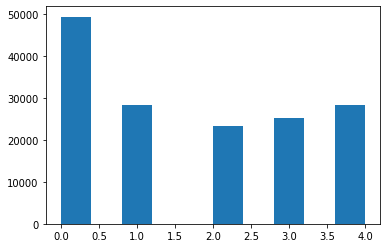

In [17]:
plt.hist(quotes.topic)

__Adding the image caption as the last line to our dataset to be able to see the closest neighbourhs__

In [18]:
image_topic = int(quotes.iloc[-1, [-1]])
image_topic

3

In [19]:
quotes = quotes.dropna()
only_topic = quotes[quotes.topic == image_topic]
only_topic.head()

,quote,author,category,quotes_length,list_tags,count_tags,topic
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22,inspirational dance heaven life hurt sing...,7.0,3
12,"Love all, trust a few, do wrong to none.","William Shakespeare, All's Well That Ends Well","do, wrong, love, trust, wrong",9,do love trust wrong,5.0,3
17,Love is that condition in which the happiness ...,"Robert A. Heinlein, Stranger in a Strange Land","essential, happiness, love",16,happiness essential love,3.0,3
27,We’re all a little weird. And life is a little...,"Robert Fulghum, True Love","love, weirdness",37,weirdness love,2.0,3
34,"Dumbledore watched her fly away, and as her si...","J.K. Rowling, Harry Potter and the Deathly Hal...","dumbledore, life, love, snape",28,dumbledore life love snape,4.0,3


In [20]:
tfidf_weight = vectorizer.fit_transform(only_topic['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_top5 = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head()

result_top5

,quote,author
7,"After your death, you will be what you were be...",Arthur Schopenhauer
24,The problem with the designated driver program...,Jeff Foxworthy
28,I look out of the window again. The rain is tr...,"Hanne Ørstavik, Like sant som jeg er virkelig"
29,If someone thinks that peace and love are just...,John Lennon
30,Righteousness is the truth revealed and workin...,"Sherry K. White, Walking in the Father's Riche..."


In [ ]:
most_suiting = quotes[quotes.topic != image_topic]
own_tags = input("Please give me 5 words that are descriptive of your picture:")
most_suiting.iloc[-1] = [own_tags,'image','image','5',own_tags,'1',image_topic]
most_suiting.tail()

In [ ]:
tfidf_weight = vectorizer.fit_transform(most_suiting['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_most_s = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head(1)

result_most_s